In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from kmodes.kprototypes import KPrototypes
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score

#regresión

from sklearn.linear_model import LinearRegression

In [2]:
#utilizamos el df de alquileres y compras limpio
df_alquileres = pd.read_csv(r'C:\Users\franp\Escritorio\Bootcamp\Proyecto Análisis Mercado Inmobiliario\Sprint 2\08032025\alquileres_completo_limpio.csv')
df_compras = pd.read_csv(r'C:\Users\franp\Escritorio\Bootcamp\Proyecto Análisis Mercado Inmobiliario\Sprint 2\08032025\compras_completo_limpio.csv')

df_alquileres_clus = pd.read_csv(r'C:\Users\franp\Escritorio\Bootcamp\Proyecto Análisis Mercado Inmobiliario\Sprint 2\df_alquileres_clustering.csv')
df_alquileres_clus = df_alquileres_clus.rename(columns={'Unnamed: 0': 'id'})

C:\Users\franp\AppData\Local\Temp\ipykernel_11932\961420971.py:3: DtypeWarning: Columns (63) have mixed types. Specify dtype option on import or set low_memory=False.
  df_compras = pd.read_csv(r'C:\Users\franp\Escritorio\Bootcamp\Proyecto Análisis Mercado Inmobiliario\Sprint 2\08032025\compras_completo_limpio.csv')


In [33]:
df_alquileres_clus

,id,area,provincia,comunidad_autonoma,tipo_de_casa,precio,precio_m2,superficie,habitaciones,baños,cluster
0,0,Justicia-Chueca (Distrito Centro. Madrid Capital),Madrid,Comunidad De Madrid,Ático,3.461320,-0.010977,0.038900,1.153133,3.314430,2
1,1,Trafalgar (Distrito Chamberí. Madrid Capital),Madrid,Comunidad De Madrid,Piso,0.638767,0.086378,-0.038234,-0.496644,-0.787027,0
2,2,Cuatro Caminos (Distrito Tetuán. Madrid Capital),Madrid,Comunidad De Madrid,Piso,0.074256,-0.055229,-0.033868,0.328244,0.238337,0
3,3,Pilar (Distrito Fuencarral-El Pardo. Madrid Ca...,Madrid,Comunidad De Madrid,Estudio,-0.336297,-0.019827,-0.049294,0.000000,-0.787027,0
4,4,Sol (Distrito Centro. Madrid Capital),Madrid,Comunidad De Madrid,Apartamento,-0.079701,-0.037528,-0.041726,-1.321532,-0.787027,0
...,...,...,...,...,...,...,...,...,...,...,...
13478,13478,Angoustrine-Villeneuve-des-Escaldes,Francia,Francia,Chalet,0.035767,-0.161435,0.011248,0.328244,1.263701,0
13479,13479,Sainte-Léocadie,Francia,Francia,Apartamento,-0.438935,-0.117182,-0.042600,-0.496644,-0.787027,0
13480,13480,Err,Francia,Francia,Apartamento,-0.567233,-0.126033,-0.046966,-1.321532,-0.787027,0
13481,13481,Bourg-Madame,Francia,Francia,Apartamento,-0.233658,0.095229,-0.052496,-1.321532,-0.787027,0


## Ajuste Variables

### Alquileres

#### Var numéricas

In [4]:
alquileres_num = df_alquileres.select_dtypes(include='float64')

In [5]:
#var num con > 30% NaN

#nan_num_alq = alquileres_num.select_dtypes(include=['float64']).isna().mean() * 100
#nan_num_alq_drop = nan_num_alq[nan_num_alq > 30]

#print(f'Las variables num de compras con > 30% de NaN a eliminar son: \n{nan_num_alq_drop}\n')
#nan_num_alq_drop_list = nan_num_alq_drop.index.to_list()

In [6]:
alquileres_num = df_alquileres[['precio', 'precio_m2', 'superficie', 'habitaciones', 'baños']]
alquileres_num

,precio,precio_m2,superficie,habitaciones,baños
0,8500.0,24.0,350.0,4.0,5.0
1,3000.0,35.0,85.0,2.0,1.0
2,1900.0,19.0,100.0,3.0,2.0
3,1100.0,23.0,47.0,NaN,1.0
4,1600.0,21.0,73.0,1.0,1.0
...,...,...,...,...,...
13478,1825.0,7.0,255.0,3.0,3.0
13479,900.0,12.0,70.0,2.0,1.0
13480,650.0,11.0,55.0,1.0,1.0
13481,1300.0,36.0,36.0,1.0,1.0


#### Var categóricas

In [7]:
#separamos var categóricas y num

alquileres_cat = df_alquileres[['area', 'provincia', 'comunidad_autonoma', 'tipo_de_casa']]
alquileres_cat


,area,provincia,comunidad_autonoma,tipo_de_casa
0,Justicia-Chueca (Distrito Centro. Madrid Capital),Madrid,Comunidad De Madrid,Ático
1,Trafalgar (Distrito Chamberí. Madrid Capital),Madrid,Comunidad De Madrid,Piso
2,Cuatro Caminos (Distrito Tetuán. Madrid Capital),Madrid,Comunidad De Madrid,Piso
3,Pilar (Distrito Fuencarral-El Pardo. Madrid Ca...,Madrid,Comunidad De Madrid,Estudio
4,Sol (Distrito Centro. Madrid Capital),Madrid,Comunidad De Madrid,Apartamento
...,...,...,...,...
13478,Angoustrine-Villeneuve-des-Escaldes,Francia,Francia,Chalet
13479,Sainte-Léocadie,Francia,Francia,Apartamento
13480,Err,Francia,Francia,Apartamento
13481,Bourg-Madame,Francia,Francia,Apartamento


### Compras

#### Var numéricas

In [3]:
compras_num = df_alquileres.select_dtypes(include='float64')

compras_num = df_alquileres[['precio', 'precio_m2', 'superficie', 'habitaciones', 'baños']]
compras_num

,precio,precio_m2,superficie,habitaciones,baños
0,8500.0,24.0,350.0,4.0,5.0
1,3000.0,35.0,85.0,2.0,1.0
2,1900.0,19.0,100.0,3.0,2.0
3,1100.0,23.0,47.0,NaN,1.0
4,1600.0,21.0,73.0,1.0,1.0
...,...,...,...,...,...
13478,1825.0,7.0,255.0,3.0,3.0
13479,900.0,12.0,70.0,2.0,1.0
13480,650.0,11.0,55.0,1.0,1.0
13481,1300.0,36.0,36.0,1.0,1.0


#### Var categóricas

In [4]:
#separamos var categóricas y num

compras_cat = df_compras[['area', 'provincia', 'comunidad_autonoma', 'tipo_de_casa']]
compras_cat

,area,provincia,comunidad_autonoma,tipo_de_casa
0,Serracines (Fresno de Torote),Madrid,Comunidad De Madrid,Chalet
1,Chorrillo (Distrito Chorrillo-Garena. Alcalá d...,Madrid,Comunidad De Madrid,Piso
2,Espartales (Distrito Ensanche-Espartales. Alca...,Madrid,Comunidad De Madrid,Piso
3,Mejorada del Campo,Madrid,Comunidad De Madrid,Casa
4,Valleaguado-La Cañada (Coslada),Madrid,Comunidad De Madrid,Piso
...,...,...,...,...
192208,Melilla,Melilla,Melilla,Piso
192209,Melilla,Melilla,Melilla,Piso
192210,Melilla,Melilla,Melilla,Piso
192211,Melilla,Melilla,Melilla,Piso


## Eliminamos NaN e imputamos valores

### Alquileres

In [ ]:
print(f'Valores nulos en cat alquileres:\n{alquileres_cat.isnull().any()}\n')
print(f'Valores nulos en num alquileres:\n{alquileres_num.isnull().any()}\n')


In [9]:
#si aparece vacío es porque ya se han imputado
alquileres_imput = alquileres_num.columns[alquileres_num.isnull().any()].to_list()
alquileres_imput

['habitaciones', 'baños']

In [10]:
imputer = SimpleImputer(strategy='mean')

#imputar los valores faltantes

alquileres_num[alquileres_imput] = imputer.fit_transform(alquileres_num[alquileres_imput])

C:\Users\franp\AppData\Local\Temp\ipykernel_19788\1822882878.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alquileres_num[alquileres_imput] = imputer.fit_transform(alquileres_num[alquileres_imput])


In [11]:
df_alquileres_2 = pd.concat([alquileres_cat, alquileres_num], axis=1)
df_alquileres_2

,area,provincia,comunidad_autonoma,tipo_de_casa,precio,precio_m2,superficie,habitaciones,baños
0,Justicia-Chueca (Distrito Centro. Madrid Capital),Madrid,Comunidad De Madrid,Ático,8500.0,24.0,350.0,4.000000,5.0
1,Trafalgar (Distrito Chamberí. Madrid Capital),Madrid,Comunidad De Madrid,Piso,3000.0,35.0,85.0,2.000000,1.0
2,Cuatro Caminos (Distrito Tetuán. Madrid Capital),Madrid,Comunidad De Madrid,Piso,1900.0,19.0,100.0,3.000000,2.0
3,Pilar (Distrito Fuencarral-El Pardo. Madrid Ca...,Madrid,Comunidad De Madrid,Estudio,1100.0,23.0,47.0,2.602074,1.0
4,Sol (Distrito Centro. Madrid Capital),Madrid,Comunidad De Madrid,Apartamento,1600.0,21.0,73.0,1.000000,1.0
...,...,...,...,...,...,...,...,...,...
13478,Angoustrine-Villeneuve-des-Escaldes,Francia,Francia,Chalet,1825.0,7.0,255.0,3.000000,3.0
13479,Sainte-Léocadie,Francia,Francia,Apartamento,900.0,12.0,70.0,2.000000,1.0
13480,Err,Francia,Francia,Apartamento,650.0,11.0,55.0,1.000000,1.0
13481,Bourg-Madame,Francia,Francia,Apartamento,1300.0,36.0,36.0,1.000000,1.0


In [12]:
#escalamos los datos numéricos

alq_2_num = (df_alquileres_2.select_dtypes(include=['float64', 'int64']))
alq_2_num_list = alq_2_num.columns.to_list()

scaler = StandardScaler()
df_alquileres_2[alq_2_num_list] = scaler.fit_transform(df_alquileres_2[alq_2_num_list])

In [13]:
alq_2_cat = (df_alquileres_2.select_dtypes(include=['O']))

In [14]:
#obtener los índices de las columnas categóricas
df_alq_cat = df_alquileres_2.select_dtypes(include=['O'])
cat_index_alq = [df_alquileres_2.columns.get_loc(col) for col in df_alq_cat]
print('Índices de columnas categóricas:', cat_index_alq)

Índices de columnas categóricas: [0, 1, 2, 3]


### Compras

In [28]:
compras_num = df_compras.select_dtypes(include='float64')

compras_num = df_compras[['precio', 'precio_m2', 'superficie', 'habitaciones', 'baños']]
compras_num

#separamos var categóricas y num

compras_cat = df_compras[['area', 'provincia', 'comunidad_autonoma', 'tipo_de_casa']]
compras_cat

,area,provincia,comunidad_autonoma,tipo_de_casa
0,Serracines (Fresno de Torote),Madrid,Comunidad De Madrid,Chalet
1,Chorrillo (Distrito Chorrillo-Garena. Alcalá d...,Madrid,Comunidad De Madrid,Piso
2,Espartales (Distrito Ensanche-Espartales. Alca...,Madrid,Comunidad De Madrid,Piso
3,Mejorada del Campo,Madrid,Comunidad De Madrid,Casa
4,Valleaguado-La Cañada (Coslada),Madrid,Comunidad De Madrid,Piso
...,...,...,...,...
192208,Melilla,Melilla,Melilla,Piso
192209,Melilla,Melilla,Melilla,Piso
192210,Melilla,Melilla,Melilla,Piso
192211,Melilla,Melilla,Melilla,Piso


In [29]:
#separamos var categóricas y num

compras_cat = df_compras[['area', 'provincia', 'comunidad_autonoma', 'tipo_de_casa']]
compras_cat

,area,provincia,comunidad_autonoma,tipo_de_casa
0,Serracines (Fresno de Torote),Madrid,Comunidad De Madrid,Chalet
1,Chorrillo (Distrito Chorrillo-Garena. Alcalá d...,Madrid,Comunidad De Madrid,Piso
2,Espartales (Distrito Ensanche-Espartales. Alca...,Madrid,Comunidad De Madrid,Piso
3,Mejorada del Campo,Madrid,Comunidad De Madrid,Casa
4,Valleaguado-La Cañada (Coslada),Madrid,Comunidad De Madrid,Piso
...,...,...,...,...
192208,Melilla,Melilla,Melilla,Piso
192209,Melilla,Melilla,Melilla,Piso
192210,Melilla,Melilla,Melilla,Piso
192211,Melilla,Melilla,Melilla,Piso


In [30]:
print(f'Valores nulos en cat alquileres:\n{compras_cat.isnull().any()}\n')
print(f'Valores nulos en num alquileres:\n{compras_num.isnull().any()}\n')

Valores nulos en cat alquileres:
area                  False
provincia             False
comunidad_autonoma    False
tipo_de_casa          False
dtype: bool

Valores nulos en num alquileres:
precio          False
precio_m2       False
superficie      False
habitaciones     True
baños            True
dtype: bool



In [31]:
#si aparece vacío es porque ya se han imputado
compras_imput = compras_num.columns[compras_num.isnull().any()].to_list()
compras_imput

['habitaciones', 'baños']

In [32]:
imputer = SimpleImputer(strategy='mean')

#imputar los valores faltantes

compras_num[compras_imput] = imputer.fit_transform(compras_num[compras_imput])

C:\Users\franp\AppData\Local\Temp\ipykernel_11932\1509676570.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compras_num[compras_imput] = imputer.fit_transform(compras_num[compras_imput])


In [33]:
df_compras_2 = pd.concat([compras_cat, compras_num], axis=1)
df_compras_2

,area,provincia,comunidad_autonoma,tipo_de_casa,precio,precio_m2,superficie,habitaciones,baños
0,Serracines (Fresno de Torote),Madrid,Comunidad De Madrid,Chalet,364900.0,2073.0,176.0,4.000000,3.0
1,Chorrillo (Distrito Chorrillo-Garena. Alcalá d...,Madrid,Comunidad De Madrid,Piso,310000.0,2520.0,123.0,3.408359,2.0
2,Espartales (Distrito Ensanche-Espartales. Alca...,Madrid,Comunidad De Madrid,Piso,255000.0,1946.0,131.0,3.000000,2.0
3,Mejorada del Campo,Madrid,Comunidad De Madrid,Casa,335000.0,1861.0,180.0,5.000000,4.0
4,Valleaguado-La Cañada (Coslada),Madrid,Comunidad De Madrid,Piso,270000.0,2571.0,105.0,3.000000,2.0
...,...,...,...,...,...,...,...,...,...
192208,Melilla,Melilla,Melilla,Piso,270000.0,2268.0,119.0,4.000000,2.0
192209,Melilla,Melilla,Melilla,Piso,175000.0,2333.0,75.0,2.000000,1.0
192210,Melilla,Melilla,Melilla,Piso,190000.0,2375.0,80.0,2.000000,2.0
192211,Melilla,Melilla,Melilla,Piso,195000.0,1392.0,140.0,3.000000,2.0


In [34]:
#escalamos los datos numéricos

com_2_num = (df_compras_2.select_dtypes(include=['float64', 'int64']))
com_2_num_list = com_2_num.columns.to_list()

scaler = StandardScaler()
df_compras_2[com_2_num_list] = scaler.fit_transform(df_compras_2[com_2_num_list])

In [35]:
#obtener los índices de las columnas categóricas
df_com_cat = df_compras_2.select_dtypes(include=['O'])
cat_index_com = [df_compras_2.columns.get_loc(col) for col in df_com_cat]
print('Índices de columnas categóricas:', cat_index_com)

Índices de columnas categóricas: [0, 1, 2, 3]


## K-Prototypes

### Alquileres

In [15]:
#convertimos el df_alquileres_2 en un array de numpy

X_alq = np.array(df_alquileres_2.values)

#### Intento 1

In [ ]:
#ajustamos el modelo K-Prototypes

kproto = KPrototypes(n_clusters=5, init='Cao', random_state=42)

#ajustar el modelo a los datos

clusters = kproto.fit_predict(X_alq, categorical=cat_index_alq)

#añadir los clusters al df original
df_alquileres_2['cluster'] = clusters

print(df_alquileres_2.head(20))

                                                 area provincia  \
0   Justicia-Chueca (Distrito Centro. Madrid Capital)    Madrid   
1       Trafalgar (Distrito Chamberí. Madrid Capital)    Madrid   
2    Cuatro Caminos (Distrito Tetuán. Madrid Capital)    Madrid   
3   Pilar (Distrito Fuencarral-El Pardo. Madrid Ca...    Madrid   
4               Sol (Distrito Centro. Madrid Capital)    Madrid   
5   Santa Eugenia (Distrito Villa de Vallecas. Mad...    Madrid   
6   Hispanoamérica (Distrito Chamartín. Madrid Cap...    Madrid   
7           Palacio (Distrito Centro. Madrid Capital)    Madrid   
8   Pilar (Distrito Fuencarral-El Pardo. Madrid Ca...    Madrid   
9                     Nuevo Tres Cantos (Tres Cantos)    Madrid   
10        Almagro (Distrito Chamberí. Madrid Capital)    Madrid   
11        Zona Avenida de Europa (Pozuelo de Alarcón)    Madrid   
12         Pacífico (Distrito Retiro. Madrid Capital)    Madrid   
13  Lista (Distrito Barrio de Salamanca. Madrid Ca...    Madri

In [ ]:
X_df_alq_num = df_alquileres_2.select_dtypes(include='float64').values

silhouette = silhouette_score(X_df_alq_num, df_alquileres_2['cluster'])

print(f'Silhouette Score: {silhouette:.3f}')

Silhouette Score: 0.397


#### Intento 2

In [ ]:
#ajustamos el modelo K-Prototypes

kproto = KPrototypes(n_clusters=4, init='Cao', random_state=42)

#ajustar el modelo a los datos

clusters = kproto.fit_predict(X_alq, categorical=cat_index_alq)

#añadir los clusters al df original
df_alquileres_2['cluster'] = clusters

print(df_alquileres_2.head(20))

                                                 area provincia  \
0   Justicia-Chueca (Distrito Centro. Madrid Capital)    Madrid   
1       Trafalgar (Distrito Chamberí. Madrid Capital)    Madrid   
2    Cuatro Caminos (Distrito Tetuán. Madrid Capital)    Madrid   
3   Pilar (Distrito Fuencarral-El Pardo. Madrid Ca...    Madrid   
4               Sol (Distrito Centro. Madrid Capital)    Madrid   
5   Santa Eugenia (Distrito Villa de Vallecas. Mad...    Madrid   
6   Hispanoamérica (Distrito Chamartín. Madrid Cap...    Madrid   
7           Palacio (Distrito Centro. Madrid Capital)    Madrid   
8   Pilar (Distrito Fuencarral-El Pardo. Madrid Ca...    Madrid   
9                     Nuevo Tres Cantos (Tres Cantos)    Madrid   
10        Almagro (Distrito Chamberí. Madrid Capital)    Madrid   
11        Zona Avenida de Europa (Pozuelo de Alarcón)    Madrid   
12         Pacífico (Distrito Retiro. Madrid Capital)    Madrid   
13  Lista (Distrito Barrio de Salamanca. Madrid Ca...    Madri

In [ ]:
X_df_alq_num = df_alquileres_2.select_dtypes(include='float64').values

silhouette = silhouette_score(X_df_alq_num, df_alquileres_2['cluster'])

print(f'Silhouette Score: {silhouette:.3f}')

Silhouette Score: 0.331


#### Intento 3

In [23]:
#ajustamos el modelo K-Prototypes

kproto = KPrototypes(n_clusters=3, init='Cao', random_state=42)

#ajustar el modelo a los datos

clusters = kproto.fit_predict(X_alq, categorical=cat_index_alq)

#añadir los clusters al df original
df_alquileres_2['cluster'] = clusters

print(df_alquileres_2.head(20))

                                                 area provincia  \
0   Justicia-Chueca (Distrito Centro. Madrid Capital)    Madrid   
1       Trafalgar (Distrito Chamberí. Madrid Capital)    Madrid   
2    Cuatro Caminos (Distrito Tetuán. Madrid Capital)    Madrid   
3   Pilar (Distrito Fuencarral-El Pardo. Madrid Ca...    Madrid   
4               Sol (Distrito Centro. Madrid Capital)    Madrid   
5   Santa Eugenia (Distrito Villa de Vallecas. Mad...    Madrid   
6   Hispanoamérica (Distrito Chamartín. Madrid Cap...    Madrid   
7           Palacio (Distrito Centro. Madrid Capital)    Madrid   
8   Pilar (Distrito Fuencarral-El Pardo. Madrid Ca...    Madrid   
9                     Nuevo Tres Cantos (Tres Cantos)    Madrid   
10        Almagro (Distrito Chamberí. Madrid Capital)    Madrid   
11        Zona Avenida de Europa (Pozuelo de Alarcón)    Madrid   
12         Pacífico (Distrito Retiro. Madrid Capital)    Madrid   
13  Lista (Distrito Barrio de Salamanca. Madrid Ca...    Madri

In [24]:
X_df_alq_num = df_alquileres_2.select_dtypes(include='float64').values

silhouette = silhouette_score(X_df_alq_num, df_alquileres_2['cluster'])

print(f'Silhouette Score: {silhouette:.3f}')

Silhouette Score: 0.533


In [27]:
df_alquileres_2.shape[0]

13483

In [29]:
df_alquileres_2.to_csv('df_alquileres_clustering.csv')

In [28]:
df_alquileres_2

,area,provincia,comunidad_autonoma,tipo_de_casa,precio,precio_m2,superficie,habitaciones,baños,cluster
0,Justicia-Chueca (Distrito Centro. Madrid Capital),Madrid,Comunidad De Madrid,Ático,3.461320,-0.010977,0.038900,1.153133,3.314430,2
1,Trafalgar (Distrito Chamberí. Madrid Capital),Madrid,Comunidad De Madrid,Piso,0.638767,0.086378,-0.038234,-0.496644,-0.787027,0
2,Cuatro Caminos (Distrito Tetuán. Madrid Capital),Madrid,Comunidad De Madrid,Piso,0.074256,-0.055229,-0.033868,0.328244,0.238337,0
3,Pilar (Distrito Fuencarral-El Pardo. Madrid Ca...,Madrid,Comunidad De Madrid,Estudio,-0.336297,-0.019827,-0.049294,0.000000,-0.787027,0
4,Sol (Distrito Centro. Madrid Capital),Madrid,Comunidad De Madrid,Apartamento,-0.079701,-0.037528,-0.041726,-1.321532,-0.787027,0
...,...,...,...,...,...,...,...,...,...,...
13478,Angoustrine-Villeneuve-des-Escaldes,Francia,Francia,Chalet,0.035767,-0.161435,0.011248,0.328244,1.263701,0
13479,Sainte-Léocadie,Francia,Francia,Apartamento,-0.438935,-0.117182,-0.042600,-0.496644,-0.787027,0
13480,Err,Francia,Francia,Apartamento,-0.567233,-0.126033,-0.046966,-1.321532,-0.787027,0
13481,Bourg-Madame,Francia,Francia,Apartamento,-0.233658,0.095229,-0.052496,-1.321532,-0.787027,0


### Compras

#### Intento 1

In [36]:
#convertimos el df_alquileres_2 en un array de numpy

X_com = np.array(df_compras_2.values)

#ajustamos el modelo K-Prototypes

kproto = KPrototypes(n_clusters=3, init='Cao', random_state=42)

#ajustar el modelo a los datos

clusters = kproto.fit_predict(X_com, categorical=cat_index_com)

#añadir los clusters al df original
df_compras_2['cluster'] = clusters

print(df_compras_2.head(20))

X_df_com_num = df_compras_2.select_dtypes(include='float64').values

silhouette = silhouette_score(X_df_com_num, df_compras_2['cluster'])

print(f'Silhouette Score: {silhouette:.3f}')

df_compras_2.to_csv('df_compras_clustering.csv')

                                                 area provincia  \
0                       Serracines (Fresno de Torote)    Madrid   
1   Chorrillo (Distrito Chorrillo-Garena. Alcalá d...    Madrid   
2   Espartales (Distrito Ensanche-Espartales. Alca...    Madrid   
3                                  Mejorada del Campo    Madrid   
4                     Valleaguado-La Cañada (Coslada)    Madrid   
5                               Camarma de Esteruelas    Madrid   
6                              Velilla de San Antonio    Madrid   
7                                                Meco    Madrid   
8                                Torres de la Alameda    Madrid   
9   Espartales (Distrito Ensanche-Espartales. Alca...    Madrid   
10                                               Meco    Madrid   
11                             Velilla de San Antonio    Madrid   
12                                            Loeches    Madrid   
13  San Isidro, Estación (Distrito Centro. Alcalá ...    Madri

### Modelo de Machine Learning - Regresión

#### RandomForestRegressor

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [20]:
# definimos la var objetivo (y) y las caracteristicas(X)

X = df_alquileres_2.drop(['precio', 'area'], axis=1)     #borro las que no quiero + la objetivo. Probar poner/quitar variables
y = df_alquileres_2['precio']

# identificamos las var cat y num

alq_2_cat_col = X.select_dtypes(include=['O']).columns.to_list()
alq_2_num_col = X.select_dtypes(include=['float64']).columns.to_list()

print(f'Las var cat son: {alq_2_cat_col}')
print(f'Las var num son: {alq_2_num_col}')

# aplicar OneHotEncoder a las variables categóricas

encoder = OneHotEncoder(drop='first', sparse_output=False)
X_encoded = pd.DataFrame(encoder.fit_transform(X[alq_2_cat_col]), columns=encoder.get_feature_names_out(alq_2_cat_col))

#Combinar variables num y cat codificadas

X_final = pd.concat([X[alq_2_num_col].reset_index(drop=True), X_encoded], axis=1)

Las var cat son: ['provincia', 'comunidad_autonoma', 'tipo_de_casa']
Las var num son: ['precio_m2', 'superficie', 'habitaciones', 'baños']


In [21]:
#entrenar el modelo
from sklearn.ensemble import RandomForestRegressor

#crear el modelo para regresión
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)

#entrenar el modelo
rf_model.fit(X_final, y)

RandomForestRegressor(max_depth=10, n_jobs=-1, random_state=42)

In [ ]:
#evaluar el modelo

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#hacer predicciones

y_pred = rf_model.predict(X_final)

#evaluar el modelo

print("MSE:", mean_squared_error(y, y_pred))
print("MAE:\n", mean_absolute_error(y, y_pred))
print("R2 Score:\n", r2_score(y, y_pred))

MSE: 0.015168258446157367
MAE:
 0.026637873254802828
R2 Score:
 0.9848317415538427


#### Plots

In [ ]:
df3_num = df3.select_dtypes(include='float64')

In [ ]:
print(f'Las var numéricas son: {df3_num.columns}')

Las var numéricas son: Index(['superficie', 'habitaciones', 'baños', 'precio', 'precio_m2'], dtype='object')


In [ ]:
df3_x_s = df3[['superficie']]
df3_y_p = df3[['precio',]]

In [ ]:
print(f'dimensiones del df: {df3.shape}')
print(f'nº de elementos en df_num_x: {df3_x_s.shape}')
print(f'nº de elementos en df_num_y: {df3_y_p.shape}')
print(f'nº de elementos en cluster: {df3['cluster'].shape}')
print(f'la longitud de cluster es: {len(df3['cluster'])}')
print(f'la longitud de df3 es: {len(df3)}')

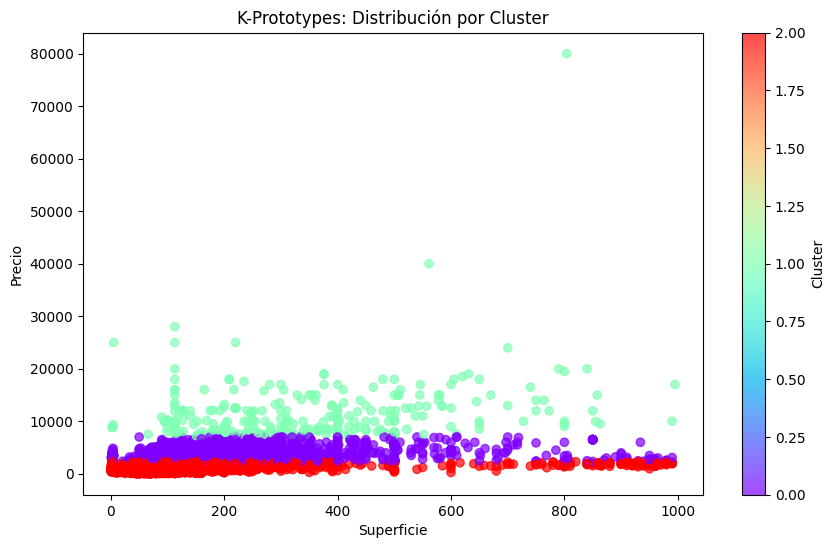

In [ ]:
#plot results
plt.figure(figsize=(10, 6))
plt.scatter(x = df3_x_s, y = df3_y_p, c=df3['cluster'], cmap='rainbow', alpha=0.7)
plt.title('K-Prototypes: Distribución por Cluster')
plt.xlabel('Superficie')
plt.ylabel('Precio')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
print(cluster_1[cluster_1['precio'] >= 27000])


In [ ]:
#probamos a qué se corresponde el outlier de precio 40000: es un chalet.
print(df3[df['precio'] == '40000'])

In [ ]:
#probamos qué tipo de inmueble tiene cada cluster

cluster_0 = df3[df3['cluster'] == 0]
tipo_de_casa_cluster0 = cluster_0['tipo_de_casa'].value_counts(normalize=True) * 100
tipo_de_casa_cluster0


tipo_de_casa
Piso                  49.660819
Apartamento           13.614035
Ático                  8.070175
Chalet                 7.719298
Casa                   7.391813
Dúplex                 5.029240
Casa adosada           2.690058
Chalet pareado         2.105263
Chalet unifamiliar     1.614035
Finca rústica          0.538012
Chalet rústico         0.374269
Chalet adosado         0.350877
Casa rústica           0.350877
Casa unifamiliar       0.210526
Casa pareada           0.140351
Estudio                0.093567
Loft                   0.046784
Name: proportion, dtype: float64

In [ ]:
cluster_1 = df3[df3['cluster'] == 1]
tipo_de_casa_cluster1 = cluster_1['tipo_de_casa'].value_counts(normalize=True) * 100
tipo_de_casa_cluster1

tipo_de_casa
Piso                  41.747573
Casa                  22.718447
Chalet                13.980583
Apartamento           12.233010
Ático                  3.883495
Casa rústica           1.359223
Finca rústica          0.970874
Casa unifamiliar       0.776699
Casa adosada           0.582524
Dúplex                 0.582524
Chalet unifamiliar     0.582524
Casa pareada           0.388350
Loft                   0.194175
Name: proportion, dtype: float64

In [ ]:
cluster_2 = df3[df3['cluster'] == 2]
tipo_de_casa_cluster2 = cluster_2['tipo_de_casa'].value_counts(normalize=True) * 100
tipo_de_casa_cluster2

tipo_de_casa
Piso                  65.603916
Apartamento           15.654628
Ático                  3.483706
Dúplex                 3.170613
Chalet                 2.751687
Casa                   2.663492
Estudio                2.143141
Casa adosada           1.552234
Loft                   0.846673
Chalet unifamiliar     0.696741
Chalet adosado         0.480663
Casa rústica           0.198439
Finca rústica          0.194029
Casa unifamiliar       0.171980
Casa pareada           0.158751
Chalet rústico         0.158751
Chalet pareado         0.070556
Name: proportion, dtype: float64

In [ ]:
df3_x_b = df3[['baños']]
df3_y_p = df3[['precio']]

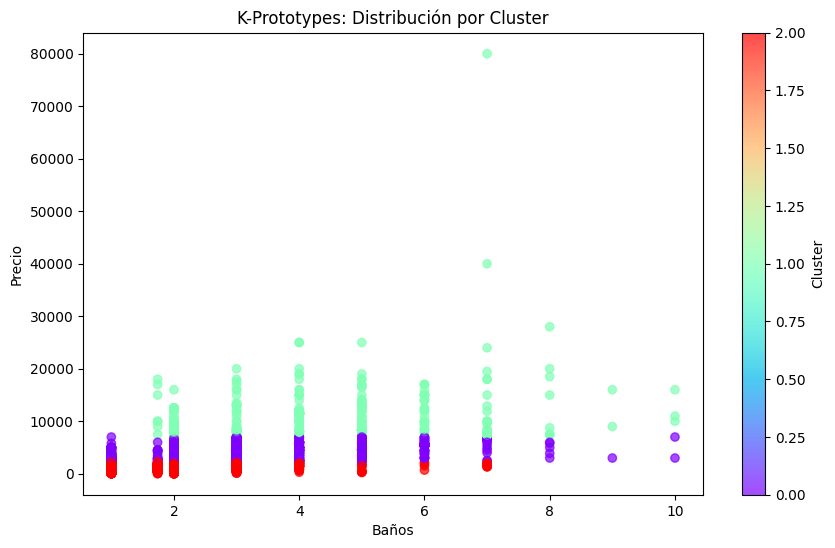

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(x = df3_x_b, y = df3_y_p, c=df3['cluster'], cmap='rainbow', alpha=0.7)
plt.title('K-Prototypes: Distribución por Cluster')
plt.xlabel('Baños')
plt.ylabel('Precio')
plt.colorbar(label ='Cluster')
plt.show()

In [ ]:
df3[df3['baños'] == 10]

,provincia,comunidad_autonoma,superficie,planta,habitaciones,baños,amueblado,precio,precio_m2,emisiones,consumo,tipo_de_casa,cluster
9001,Barcelona,Cataluña,700.000000,0,7.0,10.0,Si,7000.0,10.0,"D, D","D, D",Casa,0
16354,Madrid,Comunidad De Madrid,112.853769,0,10.0,10.0,Sin especificar,16000.0,16.0,Error al procesar emisiones,Error al procesar consumo,Casa,1
17912,Alicante,Comunidad Valenciana,112.853769,0,8.0,10.0,Si,10000.0,4.0,Error al procesar emisiones,Error al procesar consumo,Chalet,1
23407,Pontevedra,Galicia,683.000000,0,8.0,10.0,Si,3000.0,4.0,Error al procesar emisiones,Error al procesar consumo,Casa,0
24214,Islas Baleares,Islas Baleares,400.000000,0,5.0,10.0,Si,11000.0,27.0,Error al procesar emisiones,Error al procesar consumo,Chalet,1


In [ ]:
df3.iloc[3864]

provincia                                  Malaga
comunidad_autonoma                      Andalucia
superficie                                  650.0
planta                                          0
habitaciones                                  6.0
baños                                         7.0
amueblado                                      Si
precio                                    18000.0
precio_m2                                    27.0
emisiones             Error al procesar emisiones
consumo                 Error al procesar consumo
tipo_de_casa                                 Casa
cluster                                         1
Name: 3864, dtype: object

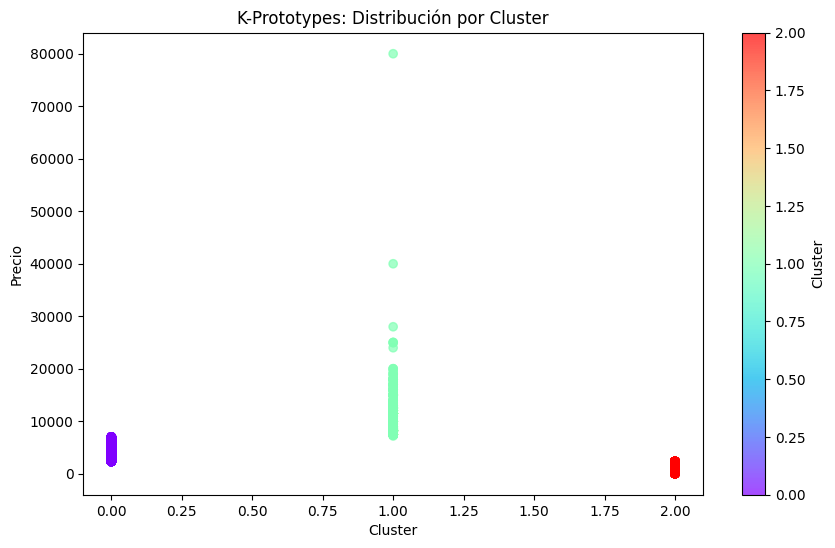

In [ ]:
df3_x_c = df3[['cluster']]

plt.figure(figsize=(10, 6))
plt.scatter(x = df3_x_c, y = df3_y_p, c=df3['cluster'], cmap='rainbow', alpha=0.7)
plt.title('K-Prototypes: Distribución por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Precio')
plt.colorbar(label ='Cluster')


In [ ]:
#INTENTO 4 - K PROTOTYPES - 5 CLUSTERS

#eliminamos variables categóricas

df3 = df2.drop(columns=['nombre', 'coordenadas', 'href', 'actualizacion', 'timestamp', 'agencia', 'se_aceptan_mascotas', 'adaptado_a_personas_con_movilidad_reducida', 'armarios_empotrados', 'vidrios_dobles', 'alcantarillado', 'luz', 'calefaccion', 'aire_acondicionado', 'gas',
       'agua', 'telefono', 'sistema_de_seguridad', 'puerta_blindada', 'chimenea', 'ascensor', 'portero_automatico', 'cocina_equipada', 'terraza', 'balcon', 'jardin', 'piscina', 'lavadero', 'comedor', 'trastero', 'garaje', 'calle_alumbrada', 'orientacion', 'gastos_de_comunidad', 'cluster'])
df3.columns

#ajustamos el modelo K-Prototypes

kproto = KPrototypes(n_clusters=5, init='Cao', random_state=42)

#ajustar el modelo a los datos

clusters = kproto.fit_predict(X, categorical=cat_index)

#añadir los clusters al df original
df3['cluster'] = clusters

print(df3.head(20))

In [ ]:
X_df_num = df3.select_dtypes(include='float64').values

silhouette = silhouette_score(X_df_num, df3['cluster'])
print(f'Silhouette Score: {silhouette:.3f}')

Silhouette Score: 0.564
